Cada uno de ustedes consiga 100 imágenes de perros y 100 imágenes de gatos.
Conformen un dataset de perros y gatos del curso. Desarrollen un modelo de
clasificación de perros y gatos, usando redes neuronales.

Para facilidad de prueba del codigo se empleo un dataset disponible en tensorflow, para la clasificacion de las imagenes de perros y gatos.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
datos, metadatos = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.QN0W0D_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


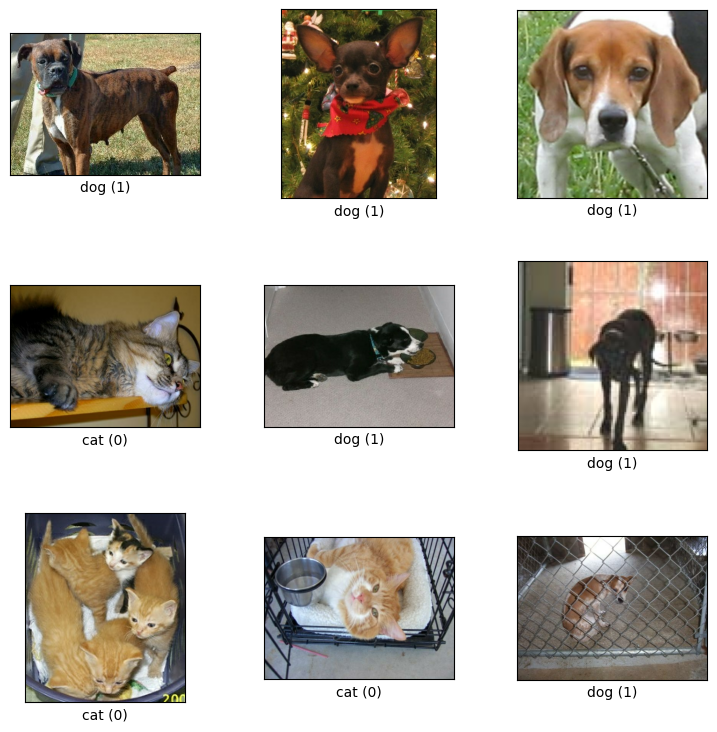

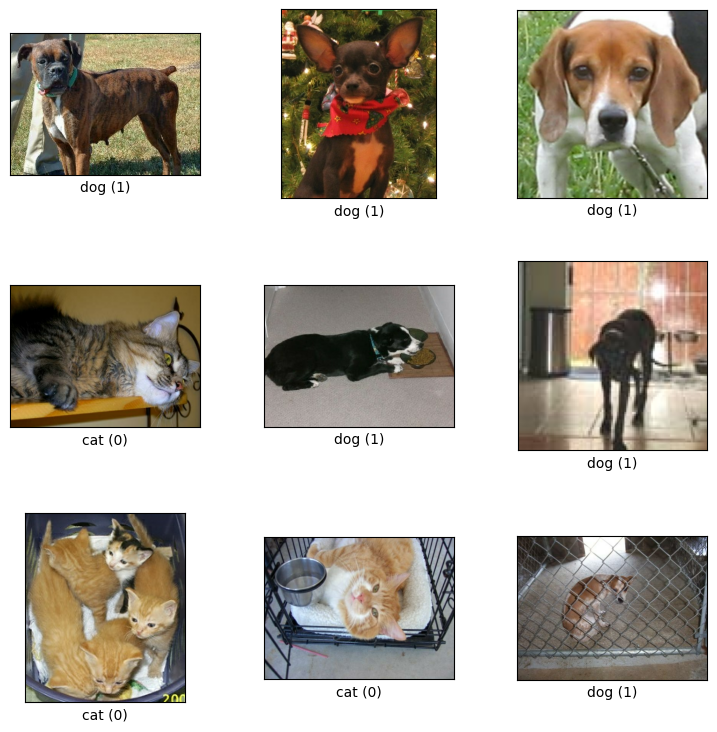

In [ ]:
tfds.show_examples(datos["train"], metadatos)

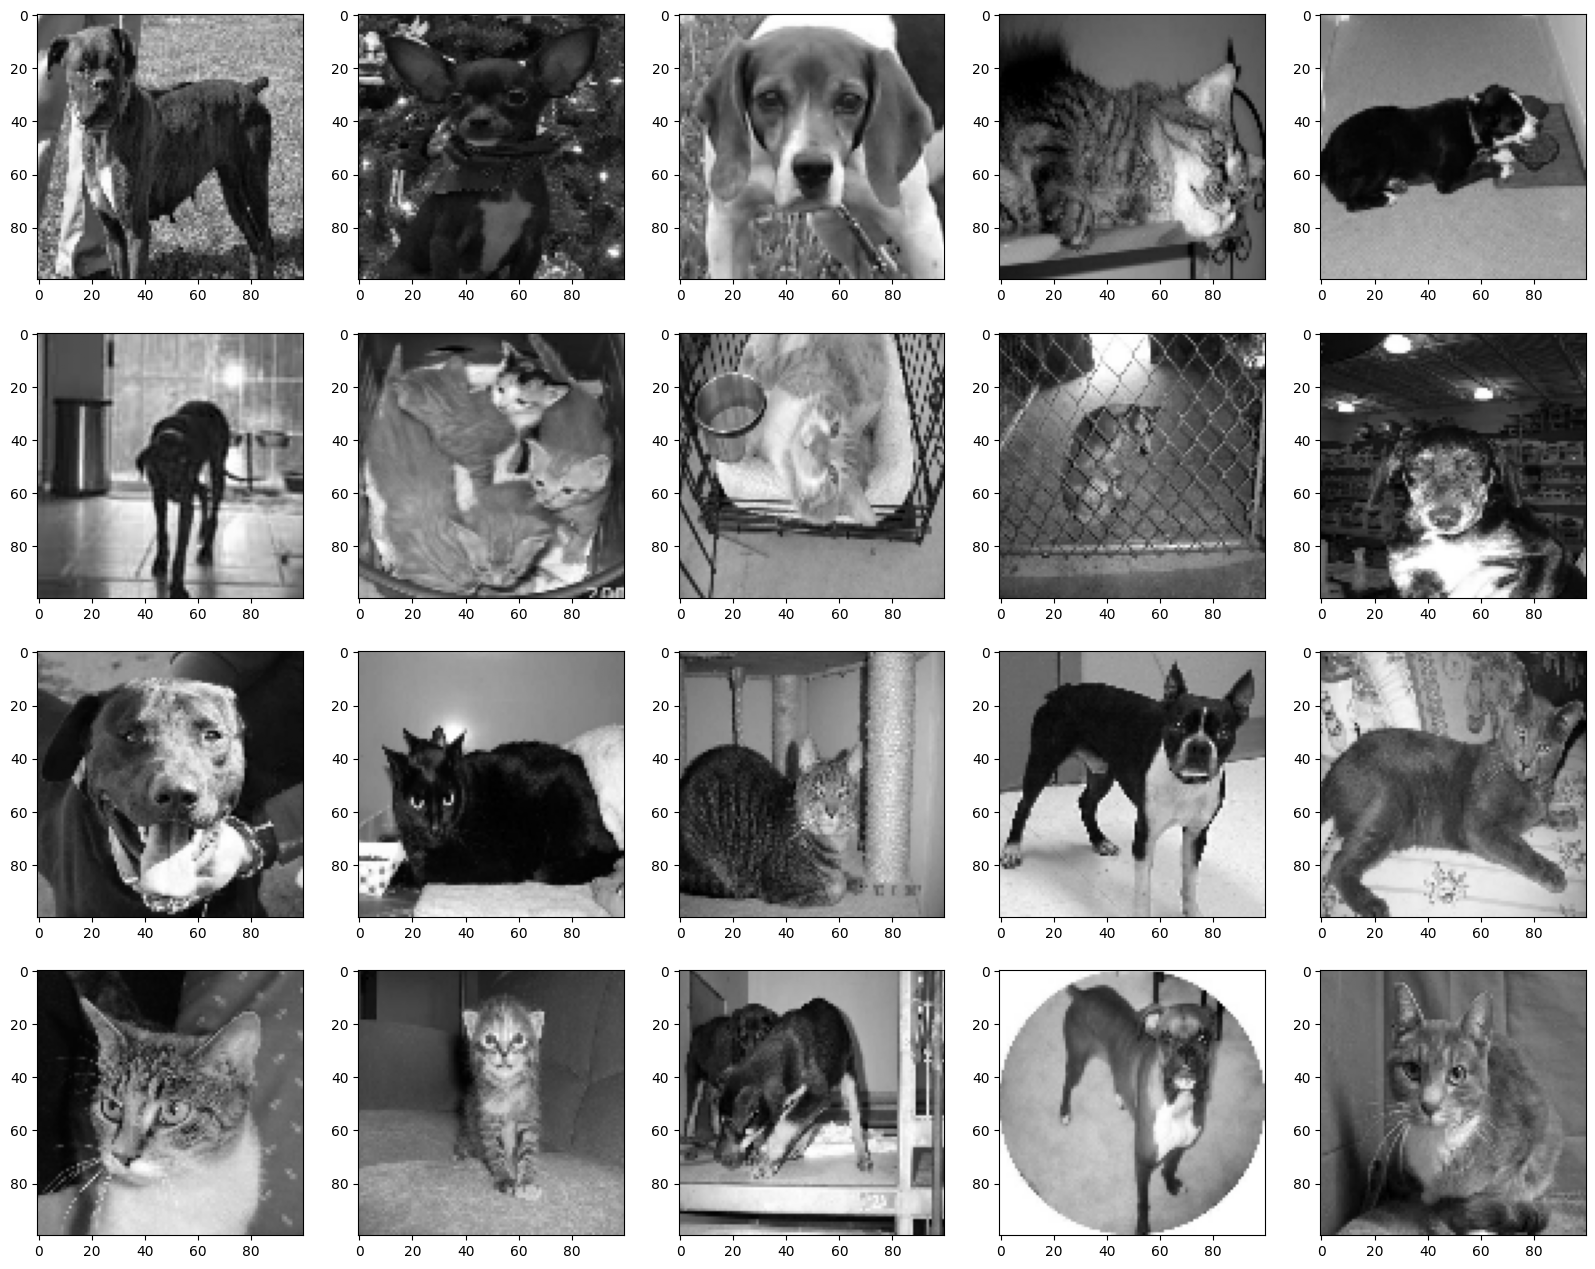

In [ ]:
plt.figure(figsize=(20,20))

TAMANO_IMG=100

# redimensionamos solo a 25 imgs
for i, (imagen, etiqueta) in enumerate(datos["train"].take(20)):
  # a. Redimensionamos las imágenes a 100x100px:
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  # b. Pasamos de color a escala de grises:
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

In [ ]:
# Creamos una lista que almacenará todo el conjunto de imágenes.
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) # 1 canal de color.

  # datos_entrenamiento: lista que almacenará listas de dos posiciones (los pixeles
  # de la imágen y su etiqueta)
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
#datos_entrenamiento ahora contiene las imágenes preprocesadas
len(datos_entrenamiento)

23262

In [ ]:
X = []
y = []

# Iteramos todos los datos de entrenamiento y lo agregamos en X (imagen), y (etiqueta):
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
X = np.array(X).astype(float) / 255

# Pasamos a "y" en un arreglo de numpay
y = np.array(y)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
modelo.fit(
    X, y, batch_size=32,
    validation_split=0.20,
    epochs=50
)

Epoch 1/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 399s 680ms/step - accuracy: 0.5910 - loss: 0.6616 - val_accuracy: 0.7408 - val_loss: 0.5303
Epoch 2/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 442s 681ms/step - accuracy: 0.7444 - loss: 0.5157 - val_accuracy: 0.7900 - val_loss: 0.4517
Epoch 3/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 442s 681ms/step - accuracy: 0.7972 - loss: 0.4358 - val_accuracy: 0.8195 - val_loss: 0.4068
Epoch 4/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 441s 679ms/step - accuracy: 0.8272 - loss: 0.3797 - val_accuracy: 0.8272 - val_loss: 0.3902
Epoch 5/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 397s 681ms/step - accuracy: 0.8475 - loss: 0.3405 - val_accuracy: 0.8457 - val_loss: 0.3599
Epoch 6/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 426s 654ms/step - accuracy: 0.8834 - loss: 0.2744 - val_accuracy: 0.8375 - val_loss: 0.3836
Epoch 7/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 397s 680ms/step - accuracy: 0.9049 - loss: 0.2374 - val_accuracy: 0.8450 - val_loss: 0.3692
Epoch 8/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 443s 681ms/step - accuracy: 0.9241 -